$$ \textbf {Facultad de Matemáticas e Ingenierías}\\
 \textbf {Simulación}\\
 \textbf {Estudiante: Glenn Nicolás Rico Linares}\\
 \textbf {Grupo 51}\\
 \textbf {HW 5}$$

In [29]:
#Librerias
import math as m
import numpy as np
import sympy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## 1. Monte Carlo Integration

$\bullet$ Some integrands are unbounded and yet their integrals exist. Evaluate the integrals

$$ \int_{0}^{1} \frac{1}{\sqrt{x}} \; dx $$
and
$$ \int_{0}^{1} \frac{\sin(x)}{\sqrt{(1-x)}} \; dx $$
using the Monte Carlo methdo. Estimate the accuracy of your results for different sample sizes.

In [22]:
def f1(x):
    return 1/(np.sqrt(x))
def f2(x):
    return (np.sin(x))/(np.sqrt(1-x))

In [23]:
Valor, err = integrate.quad(lambda x: f1(x), 0, 1)
print("Valor encontrado usando scipy ", Valor)
print("Error al usar scipy", err)

Valor encontrado usando scipy  2.0000000000000004
Error al usar scipy 5.10702591327572e-15


In [24]:
Valor, err = integrate.quad(lambda x: f2(x), 0, 1)
print("Valor encontrado usando scipy ", Valor)
print("Error al usar scipy", err)

Valor encontrado usando scipy  1.1869844447793085
Error al usar scipy 3.445690399672685e-10


In [25]:
def maxfunction(f,a,b):
    t=np.linspace(a,b,10000)
    y=f(t)
    return max(y)
def minfunction(f,a,b):
    t=np.linspace(a,b,10000)
    y=f(t)
    return min(y)
def monteCarlo2(a,b,n,f):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    maxf=maxfunction(f,a,b)
    minf=minfunction(f,a,b)
    minf=0
    
    xrand=np.random.rand(n)*(b-a)+a
    yrand=np.random.rand(n)*(maxf-minf)+minf
    cont=0
    x=np.linspace(a,b,1000)
    axes[0, 0].plot(x,f(x),color="#000000")
    axes[0, 0].set_title("Integral con método de Monte Carlo")
    axes[0, 0].set_xlabel("$x$")
    axes[0, 0].set_ylabel("$y$")
    #axes[0, 0].set_ylim(0, 800)
    
    axes[0, 1].fill_between(x,f(x), alpha = 0.8, color = "#0011FF")
    axes[0, 1].set_title("Área bajo la curva de la función")
    axes[0, 1].plot(x,f(x),color="#000000")  
    axes[0, 1].set_xlabel("$x$")
    axes[0, 1].set_ylabel("$y$")   
    #axes[0, 1].set_ylim(0, 800)
    
    axes[1, 0].remove()
    axes[1, 1].remove()
    
    for i in range(len(xrand)):
        if(f(xrand[i])>=yrand[i]):
            cont=cont+1
            axes[0, 0].scatter(xrand[i],yrand[i],color="#0011FF")
        else:
            axes[0, 0].scatter(xrand[i],yrand[i],color="#FF0000")
    return (b-a)*(maxf-minf)*cont/n
def monteCarlo(a,b,n,f):
    maxf=maxfunction(f,a,b)
    minf=0
    xrand=np.random.rand(n)*(b-a)+a
    yrand=np.random.rand(n)*(maxf-minf)+minf
    cont=0
    for i in range(len(xrand)):
        if(f(xrand[i])>=yrand[i]):
            cont=cont+1
    return (b-a)*(maxf-minf)*cont/n

## Primera integral

2.527292306006569

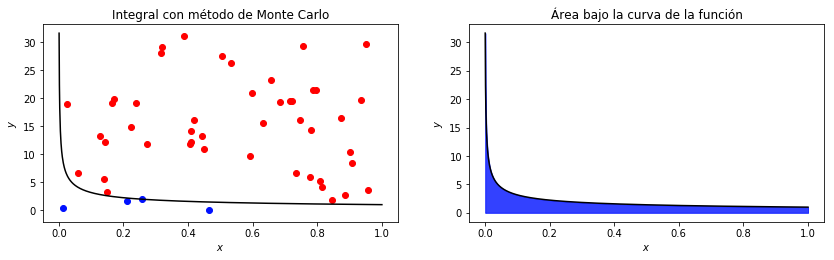

In [28]:
monteCarlo2(0.001,1,50,f1)

1.8954692295049267

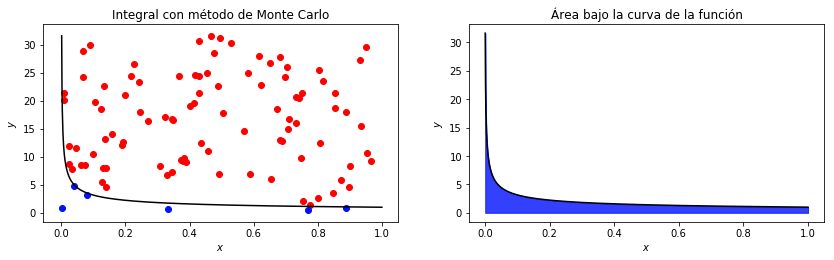

In [42]:
monteCarlo2(0.001,1,100,f1)

1.958651537155091

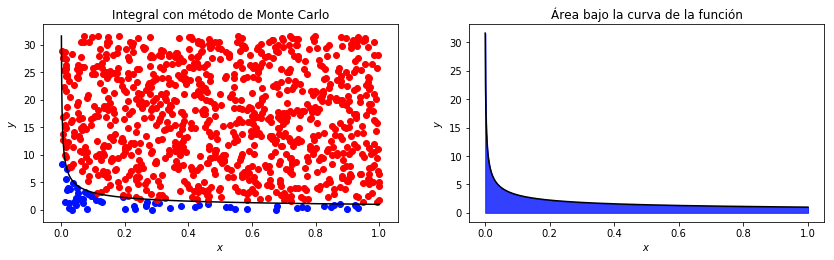

In [46]:
    monteCarlo2(0.001,1,1000,f1)

1.8101731141772053

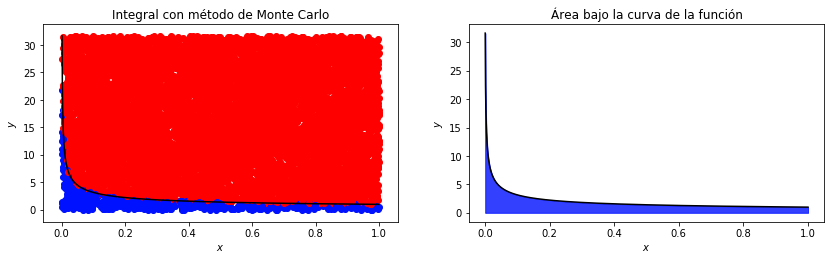

In [36]:
    monteCarlo2(0.001,1,10000,f1)

Los valores que nos dan son:

$\bullet$ con $n = 50$ da un resultado de $2.527292306006569$.

$\bullet$ con $n = 100$ da un resultado de $1.8954692295049267$.

$\bullet$ con $n = 1000$ da un resultado de $1.958651537155091$.

$\bullet$ con $n = 10000$ da un resultado de $1.8101731141772053$.

## Segunda integral

C:\Users\Nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


1.7480547984768011

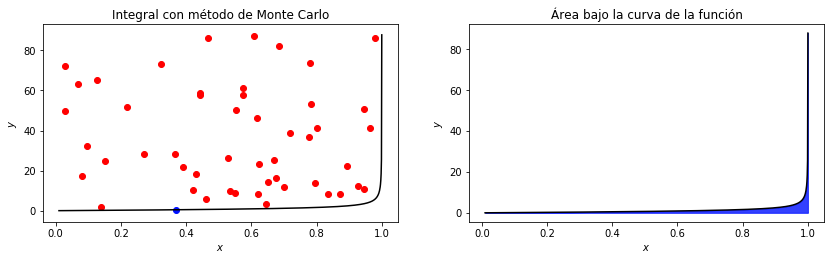

In [8]:
   monteCarlo2(0.01,1.0009,50,f2)

C:\Users\Nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


2.622082197715202

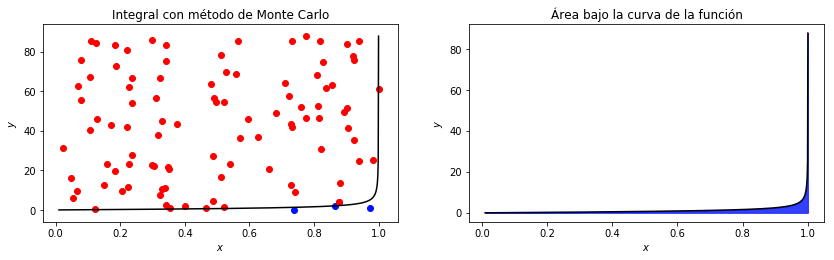

In [13]:
   monteCarlo2(0.01,1.0009,100,f2)

C:\Users\Nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


1.311041098857601

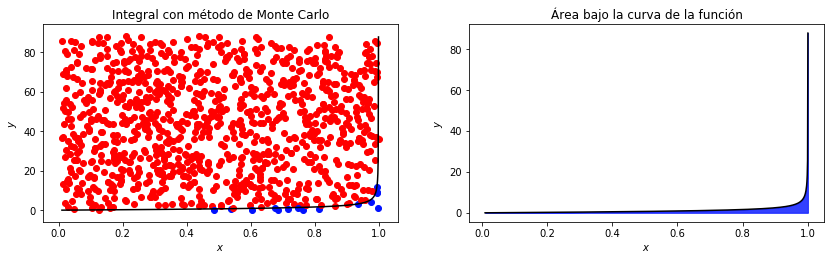

In [15]:
    monteCarlo2(0.01,1.0009,1000,f2)

C:\Users\Nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


1.223638358933761

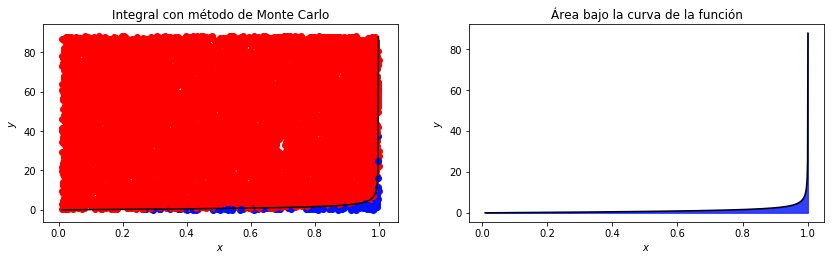

In [97]:
    monteCarlo2(0.01,1.0009,10000,f2)

Los valores que nos dan son:

$\bullet$ con $n = 50$ da un resultado de $1.7480547984768011$.

$\bullet$ con $n = 100$ da un resultado de $2.622082197715202$.

$\bullet$ con $n = 1000$ da un resultado de $1.311041098857601$.

$\bullet$ con $n = 10000$ da un resultado de $1.223638358933761$.

## 2. Pseudorandom number generators with linear structures

 $\bullet$ Crack, i.e., find $(m, a, c, x_{0})$, the following sequence
 
 – $[ 61., 262., 151., 304., 785., 122., 427., 228., 613., 110., 831., 280., 569., 226., 339., 460., 653., 470., 999., 768.]$
 
Provide the code used

Primero realizaremos una pruabe para verificar que el código manejado este funcionando.

Definimos la función para encontrar una secuencia de números.

In [1]:
def computar_n_termas(n,semilla, a, c, m):
    numeros = [semilla]
    for i in range(1,n):
        numeros.append((numeros[i-1]*a + c) % m)
    return numeros  

In [42]:
a = 3
c = 5
m = 7
semilla = 2
test_validacion = computar_n_termas(20, semilla, a, c, m)
test_validacion

[2, 4, 3, 0, 5, 6, 2, 4, 3, 0, 5, 6, 2, 4, 3, 0, 5, 6, 2, 4]

In [47]:
Vencontrado_a = 0
Vencontrado_c = 0
Vencontrado_m = 0
semilla = 2
se_encontro = False
for i in range(1,8):
    for j in range(1,8):
        for l in range(1,8):
            numeros = computar_n_termas(20, semilla, i, j, l)
            if numeros == test_validacion:
                se_encontro = True
                Vencontrado_m = l
                Vencontrado_c = j
                Vencontrado_a = i
                break
        if se_encontro == True:
            break
    if se_encontro == True:
        break
if se_encontro == True:
    print("Valores encontrados: m={}, a={}, c={}".format(Vencontrado_m, Vencontrado_a, Vencontrado_c))
    numeros1 = computar_n_termas(20,semilla,Vencontrado_a,Vencontrado_c,Vencontrado_m)
    numeros1
else:
    print("Sigue intentando")

Valores encontrados: m=7, a=3, c=5


Se encontraron los valores y se verifica que sean iguales 

In [48]:
numeros1 == test_validacion

True

Por lo que se observa que son iguales

Ahora procederemos a ver cuales son los números, se modificara los valores en los for para encontra lo valores dados. Se sabe ue el modulo es mayor a $999$ por lo cual se toma una for desde el $999$ en adelante, el $a$ y $c$ deben estar entre $1$ y $1000$ por ende el código queda de la siguiente forma.

In [2]:
lista_numeros = [61, 262, 151, 304, 785, 122, 427, 228, 613, 110, 831, 280, 569, 226, 339, 460, 653, 470, 999, 768]

Vencontrado_a = 0
Vencontrado_c = 0
Vencontrado_m = 0
semilla = 61
se_encontro = False
for i in range(1,1000): #valor a
    for j in range(1,1000): # Valor c
        for l in range(999,1500): # Valor m
            numeros = computar_n_termas(20, semilla, i, j, l)
            if numeros == lista_numeros:
                se_encontro = True
                Vencontrado_m = l
                Vencontrado_c = j
                Vencontrado_a = i
                break
        if se_encontro == True:
            break
    if se_encontro == True:
        break
if se_encontro == True:
    print("Valores encontrados: m={}, a={}, c={}".format(Vencontrado_m, Vencontrado_a, Vencontrado_c))
    numeros2 = computar_n_termas(20,semilla,Vencontrado_a,Vencontrado_c,Vencontrado_m)
    print(numeros2)
else:
    print("Sigue intentando")

Valores encontrados: m=1024, a=137, c=97
[61, 262, 151, 304, 785, 122, 427, 228, 613, 110, 831, 280, 569, 226, 339, 460, 653, 470, 999, 768]


In [56]:
numeros2 == lista_numeros

True

$\bullet$ Together with this assignment you will find a sequence of $100.000$ numbers (“Sequence.txt”) generated with the brand new PPP algorithm. Your task will be to test if the algorithm passes the $\mathcal{x}^{2}$ Test

In [30]:
data = pd.read_csv('Sequence.txt', header = None)

In [31]:
data

,0
0,0.964150
1,0.609960
2,0.298330
3,0.107370
4,0.798690
5,0.811400
6,0.577020
7,0.698460
8,0.334260
9,0.835190


In [38]:
chi2, p, dof, expected = stats.chi2_contingency(data)
print(p)

1.0
